# Train the dataset

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle, os

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import *

import seaborn as sns

In [14]:
df = pd.read_csv('../../dataset/csv/dataset_v1.csv')
df.head(3)


,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,y74,z74,v74,x75,y75,z75,v75,face_d75,face_s75,hand_s75
0,celinguk,0.452516,0.177898,-0.904605,0.999882,0.516650,0.137372,-0.673349,0.999341,0.422173,...,0.609458,-0.498302,0.967000,0.330829,0.609458,-0.498302,0.967000,2.0,0.0,0.0
1,celinguk,0.687073,0.188956,-0.612002,0.996062,0.648438,0.158911,-0.388706,0.987777,0.601190,...,0.525487,-0.142604,0.941713,0.311903,0.525487,-0.142604,0.941713,0.0,0.0,0.0
2,celinguk,0.485780,0.217672,-0.780860,0.996510,0.578979,0.168560,-0.718592,0.986905,0.490544,...,0.577168,-0.192743,0.966556,0.330957,0.577168,-0.192743,0.966556,2.0,0.0,0.0


In [15]:
df['class'].value_counts()

class
celinguk       50
diam           50
nodong         50
tutupmuka      50
tutuptangan    50
Name: count, dtype: int64

In [16]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1234)

print(f"Train set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Train set size: 212
Test set size: 38


In [17]:
y_test

202    tutuptangan
94            diam
31        celinguk
246    tutuptangan
215    tutuptangan
6         celinguk
91            diam
73            diam
129         nodong
5         celinguk
136         nodong
111         nodong
161      tutupmuka
74            diam
48        celinguk
65            diam
7         celinguk
218    tutuptangan
32        celinguk
63            diam
132         nodong
97            diam
51            diam
122         nodong
9         celinguk
145         nodong
110         nodong
196      tutupmuka
52            diam
238    tutuptangan
29        celinguk
131         nodong
125         nodong
141         nodong
235    tutuptangan
164      tutupmuka
245    tutuptangan
95            diam
Name: class, dtype: object

In [18]:
model = make_pipeline(StandardScaler(), SVC(probability=True)).fit(X_train, y_train)
y_probs = model.predict_proba(X_train)

In [19]:
version = 1
path = f'../../model/trained/svc/'
os.makedirs(os.path.dirname(path), exist_ok=True)

with open(f'{path}/svc_model_v{version}.pkl', 'wb') as f:
    pickle.dump(model, f)

In [20]:
y_pred = model.predict(X_train)
y_pred

array(['diam', 'tutupmuka', 'celinguk', 'nodong', 'tutupmuka', 'diam',
       'nodong', 'nodong', 'nodong', 'tutuptangan', 'diam', 'celinguk',
       'celinguk', 'diam', 'tutuptangan', 'tutupmuka', 'diam', 'diam',
       'diam', 'nodong', 'tutuptangan', 'tutuptangan', 'tutupmuka',
       'tutuptangan', 'nodong', 'nodong', 'diam', 'diam', 'nodong',
       'celinguk', 'diam', 'tutupmuka', 'tutuptangan', 'nodong',
       'tutupmuka', 'celinguk', 'nodong', 'tutupmuka', 'tutupmuka',
       'nodong', 'tutupmuka', 'celinguk', 'celinguk', 'diam', 'celinguk',
       'tutupmuka', 'tutuptangan', 'celinguk', 'tutuptangan', 'celinguk',
       'tutupmuka', 'tutupmuka', 'tutupmuka', 'nodong', 'tutuptangan',
       'tutuptangan', 'tutupmuka', 'celinguk', 'nodong', 'nodong',
       'tutupmuka', 'celinguk', 'nodong', 'diam', 'tutupmuka', 'diam',
       'nodong', 'tutupmuka', 'celinguk', 'tutuptangan', 'tutuptangan',
       'diam', 'tutuptangan', 'tutupmuka', 'tutuptangan', 'tutuptangan',
       'tutupmu

In [21]:
# Set the threshold for positive detection
threshold = 0.75

# Get the predicted probabilities for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Apply the threshold to get binary predictions
y_pred = (y_pred_proba >= threshold).astype(int)

# Convert y_test to binary format (1 for positive class, 0 for negative class)
y_test_binary = (y_test == 'positive_class').astype(int)  # Replace 'positive_class' with the actual positive class label


# Generate confusion matrix
cm = confusion_matrix(y_test_binary, y_pred)
TN, FP, FN, TP = cm.ravel()

print("True Positive (TP):", TP)
print("False Positive (FP):", FP)
print("True Negative (TN):", TN)
print("False Negative (FN):", FN)

True Positive (TP): 0
False Positive (FP): 8
True Negative (TN): 30
False Negative (FN): 0


# Visualization


Classification Report (Training Data):
              precision    recall  f1-score   support

    celinguk     0.9762    0.9762    0.9762        42
        diam     0.9512    0.9750    0.9630        40
      nodong     0.9744    0.9500    0.9620        40
   tutupmuka     1.0000    0.9787    0.9892        47
 tutuptangan     0.9773    1.0000    0.9885        43

    accuracy                         0.9764       212
   macro avg     0.9758    0.9760    0.9758       212
weighted avg     0.9766    0.9764    0.9764       212



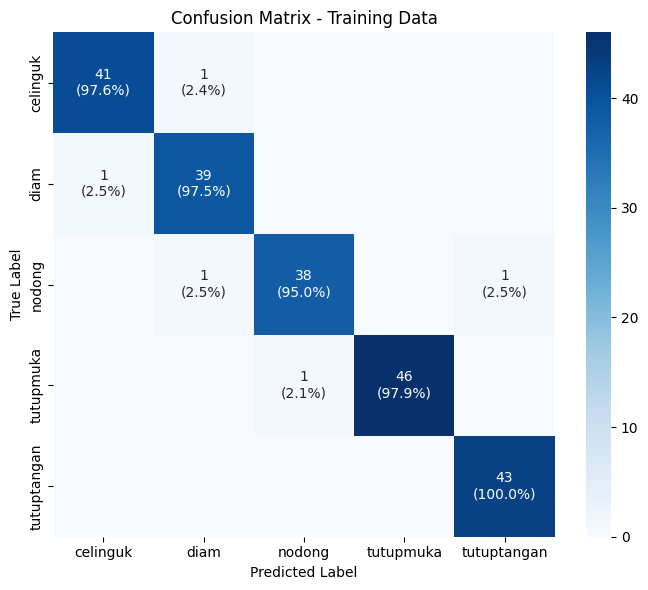

In [22]:
y_pred = model.predict(X_train)

print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_pred, digits=4))

cm = confusion_matrix(y_train, y_pred, labels=np.unique(y_train))
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = (cm / cm_sum.astype(float)) * 100

annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if c == 0:
            annot[i, j] = ""
        else:
            annot[i, j] = f"{c}\n({p:.1f}%)"

plt.figure(figsize=(7, 6))
sns.heatmap(
    cm,
    annot=annot,
    fmt='',
    cmap='Blues',
    cbar=True,
    xticklabels=np.unique(y_train),
    yticklabels=np.unique(y_train)
)
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
